<a href="https://www.bigdatauniversity.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Clasificación con Python</font></h1>


En este cuaderno trataremos de practicar todos los algoritmos de clasificación aprendidos durante el curso.

Cargaremos un conjunto de datos mediante la librería Pandas, aplicaremos los siguientes algoritmos y encontraremos el mejor para este conjunto en específico con métodos precisos de evaluación.

Cargemos primero las librerías necesarias:


In [92]:
import numpy as np
import pandas as pd 
import json

#Importación para el uso del clasificador KNN
from sklearn.neighbors import KNeighborsClassifier

#Label encoder para convertir los datos categóricos a numéricos
from sklearn.preprocessing import LabelEncoder

from sklearn import datasets
#Importacion de módulo para dividir el dataset
from sklearn.model_selection import train_test_split
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler
#Importación knn
from sklearn.neighbors import KNeighborsClassifier
#Importación de matriz de confusión
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

import graphviz
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from scipy.stats import normaltest

#Para máquinas de soporte vectorial
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from google.colab import files
import io



### Acerca del conjunto de datos


Este conjunto de datos es sobre prestamos pasados. El conjunto **Loan_train.csv** incluye detalles sobre 346 clientes cuyos prestamos estan pagados o pendientes de cobrar.

| Campo          | Descripción                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | El prestamos puede estar pagado o pendiente                                           |
| Principal      | Cantidad del prestamo principal                                                       |
| Terms          | Términos del cobro del prestamo, que pueden ser semanales, quincenales o mensuales    |
| Effective_date | La fecha cuando el prestamo fue creado                                                |
| Due_date       | Debido a que se programa para pagarse una sola vez, solo hay una fecha de vencimiento |
| Age            | Edad del solicitante                                                                  |
| Education      | Escolaridad del solicitante                                                           |
| Gender         | Genero del solicitante                                                                |


Descargemos el conjunto de datos


In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-04-10 12:28:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2022-04-10 12:28:12 (153 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Cargar datos desde el archivo CSV


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convertir a un objeto de tipo fecha(date)/tiempo(time)


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Visualización de los Datos y pre procesamiento


Veamos cuantas de cada clase existen en el conjunto de datos.


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 personas han saldado el préstamo a tiempo, mientras 86 han sido llamados a pagar


Grafiquemos algunas columnas para entender mejor los datos:


In [7]:
# observación: la instalación de seaborn puede tomar algunos minutos
!conda install -c anaconda seaborn -y

/bin/bash: conda: command not found


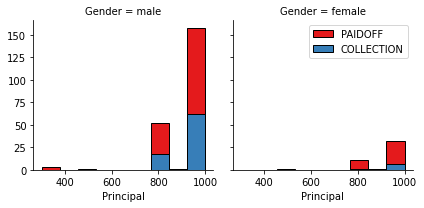

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

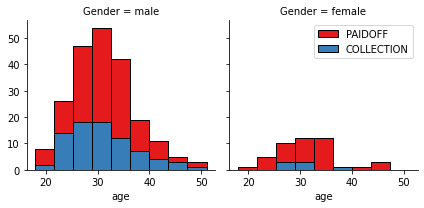

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre procesamiento: selección/extracción de características


### Veamos el día de la semana en que la gente obtuvo el préstamo


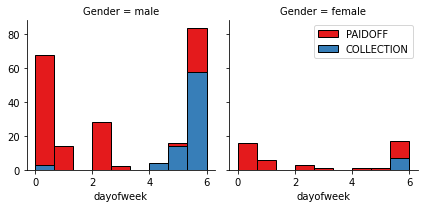

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


Observamos que la gente que obtuvo el préstamo al final de la semana no lo pagó. Utilicemos la binarización para establecer unops valores límite menores de 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convertir características categóricas en valores numéricos


Observemos la característica de genero:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% de las mujeres pagan sus prestamos mientras que el 73% de los hombres lo hacen.


Convirtamos en 0 a los hombres y a las mujeres en 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## Codificación One Hot

#### ¿Qué hay acerca de la educación?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Característica antes de la codificación One Hot


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Utilice la técnica de codificación One Hot para transformar las variables categóricas en binarias y agrégelas al dataframe de características


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Selección de característica


Definamos los conjuntos de características, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


¿Cuales son nuestras etiquetas?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Datos Normalizados


La estandarización de los datos le da a estos una media de cero y varianza con valor de la unidad (tecnicamente debería hacerse despues de la división entre grupos de prueba y entrenamiento)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Clasificación


Ahora es su turno, utilice el conjunto de entrenamiento para construir un modelo preciso. Despues use el conjunto de validación para reportar la precisión del modelo.
Deberá utilizar el siguiente algoritmo:

*   K Nearest Neighbor(KNN)
*   Arbol de Decisión
*   Maquina de Soporte Vectorial (SVM)
*   Regresión Logística

**Observaciónes:**

*   Puede ir arriba y cambiar el pre procesamiento, la selección y extracción de características, etc, para mejorar el modelo.
*   Deberá utilizar alguna de las librerías para el desarrollo de algoritmos de clasificación; ya sea scikit-learn, Scipy o Numpy
*   Deberá incluir el código del algoritmo en las siguientes celdas.


# K Nearest Neighbor(KNN)

Observación: Deberá encontrar el mejor valor de k para construir el modelo con la mejor eficacia.
**Advertencia:** No deberá utilizar **loan_test.csv** para encontrar el mejor valor de k, sin embargo, puede dividir train_loan.csv para entrenamiento y pruebas para encontrar el mejor valor de **k**.


In [22]:
# Dividimos la parte de entrenamiento y la parte de pruebas y mostramos la estructurtura de dichas divisiones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [26]:
# Difinimos el valor de k y evaluamos el resultado del entrenamiento
k = 32
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors = k, p = 2,
           weights='uniform')

y_predict = knn.predict(X_test)

print("Prueba de exactitud: ",metrics.accuracy_score(y_test,y_predict))

PPrueba de exactitud:  0.6857142857142857


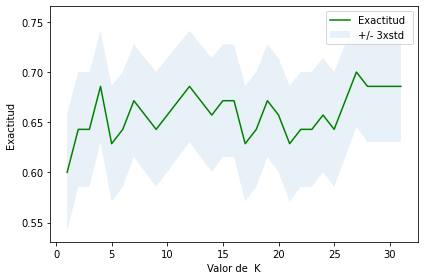

La mejor exactitud es de:  0.7 Con un K de:  27


In [30]:
# Verificación iterativa de varios valores de K
Ks = k
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Exactitud ', '+/- 3xstd'))
plt.ylabel('Exactitud ')
plt.xlabel('Valor de  K')
plt.tight_layout()
plt.show()

print( "La mejor exactitud es de: ", mean_acc.max(), "Con un K de: ", mean_acc.argmax()+1) 

In [85]:
# Métricas adicionales
KNN_F1_Score = f1_score(y_test, y_predict, average='weighted')
KNN_JS_Score = jaccard_score(y_test, y_predict,pos_label = "PAIDOFF")

# Arbol de Decisión


In [67]:
# Definimos el modelo con sus respectivos Hiperparametros, usando los particiones anteriores
LoanTree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None)
LoanTree.fit(X_train, y_train)
y_predict = LoanTree.predict(X_test)
print("Prueba de exactitud: ",metrics.accuracy_score(y_test,y_predict))

Prueba de exactitud:  0.5714285714285714


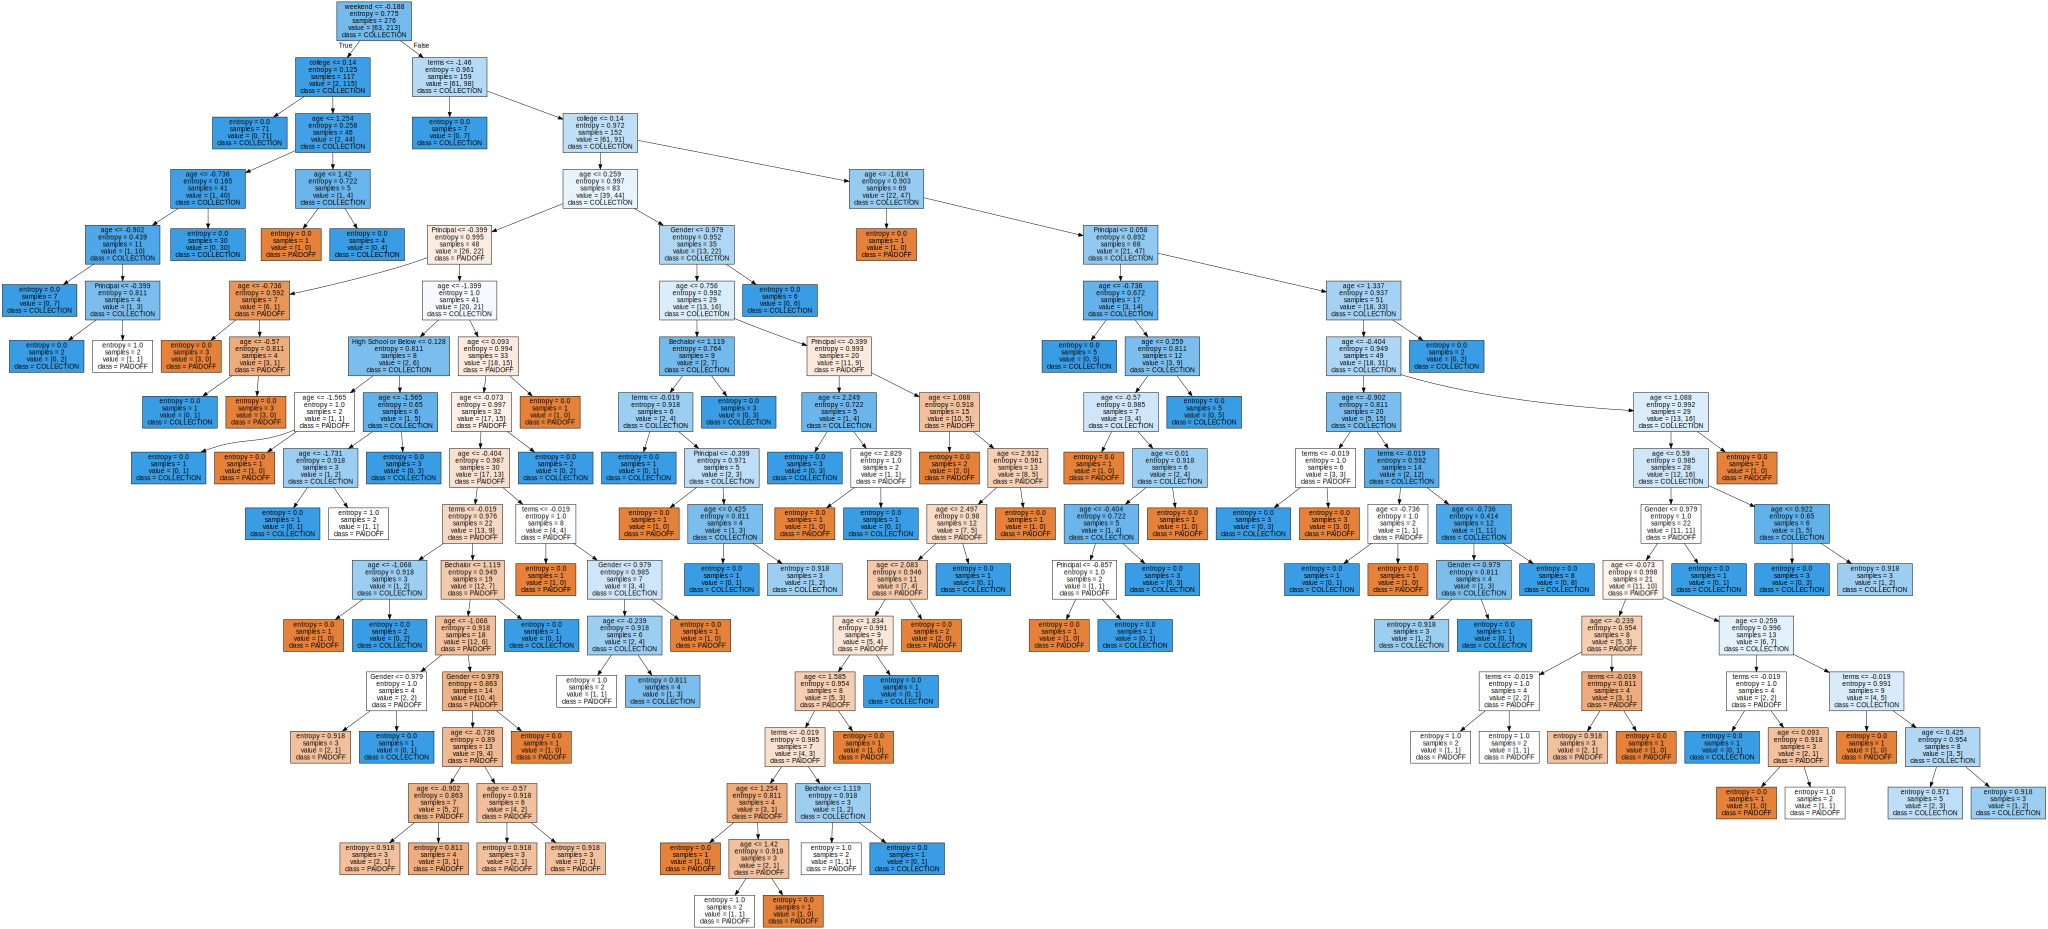

<Figure size 7200x14400 with 0 Axes>

In [69]:
# Graficación del arbol con su máxima profundidad
plt.figure(figsize=(100, 200))
etiquetas = df["loan_status"].unique().tolist()
caracteristicas = Feature.columns
export_graphviz(LoanTree,out_file="arbol.dot",class_names=etiquetas, feature_names = caracteristicas,impurity=True,filled=True)

with open("arbol.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

In [70]:
# Verificación de múltiples profundidades
KTs=15
meanTree_acc=np.zeros((KTs-1))
ConfustionMtx=[];
for n in range (1,KTs):
    paidTree2 = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    paidTree2.fit(X_train, y_train)
    predpaidTree2 = paidTree2.predict(X_test)
    meanTree_acc[n-1]=metrics.accuracy_score(y_test,predpaidTree2)
meanTree_acc
for m, s in zip(range(1,KTs),meanTree_acc):
    print('Para max_depth:',m,', la precision del modelo es:',s)
    
print("La mejor Precision del Arbol de decisiones fue con ",meanTree_acc.max(),"con max_depth=",meanTree_acc.argmax()+1)

Para max_depth: 1 , la precision del modelo es: 0.6714285714285714
Para max_depth: 2 , la precision del modelo es: 0.6714285714285714
Para max_depth: 3 , la precision del modelo es: 0.6714285714285714
Para max_depth: 4 , la precision del modelo es: 0.5857142857142857
Para max_depth: 5 , la precision del modelo es: 0.6142857142857143
Para max_depth: 6 , la precision del modelo es: 0.5571428571428572
Para max_depth: 7 , la precision del modelo es: 0.5714285714285714
Para max_depth: 8 , la precision del modelo es: 0.5857142857142857
Para max_depth: 9 , la precision del modelo es: 0.6
Para max_depth: 10 , la precision del modelo es: 0.6
Para max_depth: 11 , la precision del modelo es: 0.5714285714285714
Para max_depth: 12 , la precision del modelo es: 0.5857142857142857
Para max_depth: 13 , la precision del modelo es: 0.5714285714285714
Para max_depth: 14 , la precision del modelo es: 0.5714285714285714
La mejor Precision del Arbol de decisiones fue con  0.6714285714285714 con max_depth= 1

In [84]:
# Métricas adicionales
DT_F1_Score = f1_score(y_test, y_predict, average='weighted')
DT_JS_Score = jaccard_score(y_test, y_predict,pos_label = "PAIDOFF")

# Maquina de Soporte Vectorial (SVM)


In [71]:
# Nuevamente definimos el modelo con sus respectivos Hiperparametros, usando los particiones anteriores
svc = SVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
print("Prueba de exactitud: ",metrics.accuracy_score(y_test,y_predict))

Prueba de exactitud:  0.6714285714285714


In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        23
     PAIDOFF       0.67      1.00      0.80        47

    accuracy                           0.67        70
   macro avg       0.34      0.50      0.40        70
weighted avg       0.45      0.67      0.54        70

Matriz de confusión, sin normalización
[[ 0 23]
 [ 0 47]]


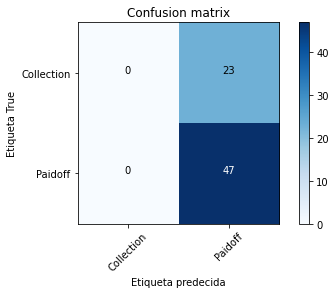

In [72]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)
print (classification_report(y_test, y_predict))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Collection','Paidoff'],normalize= False,  title='Confusion matrix')

In [86]:
# Métricas adicionales
SVM_F1_Score = f1_score(y_test, y_predict, average='weighted')
SVM_JS_Score = jaccard_score(y_test, y_predict,pos_label = "PAIDOFF")

# Regresión Logística


In [73]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print("Prueba de exactitud: ",metrics.accuracy_score(y_test,y_predict))

Prueba de exactitud:  0.6714285714285714


In [76]:
lr.predict_proba(X_test)[:1]
y_pred_prob = lr.predict_proba(X_test)

In [77]:
LR_LL_Score = log_loss(y_test, y_pred_prob)
LR_LL_Score

0.5400943938513264

In [87]:
# Métricas adicionales
LR_LL_Score = log_loss(y_test, y_pred_prob)
LR_F1_Score = f1_score(y_test, y_predict, average='weighted')
LR_JS_Score = jaccard_score(y_test, y_predict,pos_label = "PAIDOFF")

# Evaluación del Modelo con el Conjunto de Prueba


In [57]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Primero descarge y carge el conjunto de pruebas:


In [58]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-04-10 13:24:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-04-10 13:24:16 (444 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Cargar el conjunto de prueba para la evaluación


In [59]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [66]:
# Preparaqción de los datos
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['loan_status'].value_counts()
test_df.head()

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()

test_X = preprocessing.StandardScaler().fit(test_feature).transform(test_feature)
test_X[0:5]

test_y = test_df['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [81]:
# Evaluación múltiple de todas las métricas por cada modelo
knn_y_pred = knn.predict(test_X)
KNN_F1_TEST = f1_score(test_y, knn_y_pred, average='weighted')
KNN_JS_TEST = jaccard_score(test_y, knn_y_pred, pos_label = "PAIDOFF")

DT_y_pred = LoanTree.predict(test_X)
DT_F1_TEST = f1_score(test_y, DT_y_pred, average='weighted')
DT_JS_TEST = jaccard_score(test_y, DT_y_pred, pos_label = "PAIDOFF")

SVM_y_pred = svc.predict(test_X)
SVM_F1_TEST = f1_score(test_y, SVM_y_pred, average='weighted')
SVM_JS_TEST = jaccard_score(test_y, SVM_y_pred, pos_label = "PAIDOFF")

LR_y_pred = lr.predict(test_X)
LR_y_pred_prob = lr.predict_proba(test_X)
LR_F1_TEST = f1_score(test_y, LR_y_pred, average='weighted')
LR_JS_TEST = jaccard_score(test_y, LR_y_pred, pos_label = "PAIDOFF")
LR_LL_TEST = log_loss(test_y, LR_y_pred_prob)

In [90]:
#Preparación de los reportes

Train_Report = {}

#F1
Train_Report['KNN_F1'] = KNN_F1_Score
Train_Report['DT_F1'] = DT_F1_Score
Train_Report['SVM_F1'] = SVM_F1_Score
Train_Report['LR_F1'] = LR_F1_Score

#Jaccard
Train_Report['KNN_JS'] = KNN_JS_Score
Train_Report['DT_JS'] = DT_JS_Score
Train_Report['SVM_JS'] = SVM_JS_Score
Train_Report['LR_JS'] = LR_JS_Score

#LogLoss
Train_Report['LR_LL'] = LR_LL_Score

Test_Report = {}

#KNN
Test_Report['KNN_F1'] = KNN_F1_TEST
Test_Report['KNN_JS'] = KNN_JS_TEST
Test_Report['KNN_LL'] = "N/A"

#Decision Tree
Test_Report['DT_F1'] = DT_F1_TEST
Test_Report['DT_JS'] = DT_JS_TEST

#Support Vector Machine
Test_Report['SVM_F1'] = SVM_F1_TEST
Test_Report['SVM_JS'] = SVM_JS_TEST

#LogicalRegression
Test_Report['LR_F1'] = LR_F1_TEST
Test_Report['LR_JS'] = LR_JS_TEST
Test_Report['LR_LL'] = LR_LL_TEST

#Agrupación de los resultados
F1_Score_list = [KNN_F1_TEST, DT_F1_TEST, SVM_F1_TEST, LR_F1_TEST]
Jaccard_score_list = [KNN_JS_TEST, DT_JS_TEST, SVM_JS_TEST, LR_JS_TEST]
LogLoss_list = ["N/A", "N/A", "N/A", LR_LL_TEST ]
Final_results = [Jaccard_score_list, F1_Score_list, LogLoss_list]

In [91]:
# Visualización del reporte final
df = pd.DataFrame(Final_results).transpose()
df.columns = ['Jaccard', 'F1-Score', 'LogLoss']
df.columns.name = "Algorithm"
df.index = ["KNN", "Decision Tree", "SVM", "LogisticRegression"]
df

Algorithm,Jaccard,F1-Score,LogLoss
KNN,0.764706,0.728395,N/A
Decision Tree,0.693878,0.710576,N/A
SVM,0.740741,0.630418,N/A
LogisticRegression,0.740741,0.630418,0.47854


# Reporte

Deberá reportar la precisión del modelo utilizando distintas métricas de evaluación:


| Algoritmo           | Jaccard | F1 | LogLoss |
| ------------------- | ------- | -- | ------- |
| KNN                 | 0.764706       | 0.728395  | NA      |
| Arbol de Decisión   | 0.693878       | 0.710576  | NA      |
| SVM                 | 	0.740741       | 0.630418  | NA      |
| Regresión Logística | 0.740741       | 0.630418  | ?       |


<h2>¿Quiere aprender mas?</h2>

IBM SPSS Modeler es una plataforma para el análisis que contiene muchos algoritmos de aprendizaje automático (machine learning). Ha sido diseñado con el fin de ofrecer predicciones inteligentes a las decisiones hechas por personas, grupos, sistemas - con la compañia como un todo. Una prueba gratuita esta disponible a traves de este curso desde aqui: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">SPSS Modeler</a>

Además, puede utilizar Watson Studio para ejecutar estos cuardernos mas rápido y con conjuntos de datos mas grandes. Watson Studio es la solución líder de IBM en la nube para científicos de datos, contruido por científicos de datos. Con los cuadernos de Jupyter, RStudio, Apache Spark y librerías pre instaladas en la nube, Watson Studio permite a los científicos de datos colaborar en sus proyectos sin necesidad de instalar nada. Unase a la gran comunidad de usuarios de Watson Studio hoy con un cuenta gratuita en <a href="https://cloud.ibm.com/registration/trial?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">Watson Studio</a>

<h3>Gracias por terminar esta lección</h3>

<h4>Autor:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD es un Científico de Datos para IBM con una trayectoria de desarrollo de aplicaciones a nivel empresarial que han ayudado a mejorar la habilidad de transformar información en conocimiento practico. Es un investigador en el campo de la minería de datos y experto en el desarrollo de métodos analíticos avanzados como son el aprendizaje automático y el modelado estadístico de grandes conjuntos de datos.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">MIT License</a>.</p>
